# POST TEST 6
### NAMA : APRISA IDMA MUTIARA
### NIM : 2209106001
### KELAS : KECERDASAN BUATAN A1 22

# Import library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Membaca dan menampilkan lima teratas dataset

In [2]:
sephora = pd.read_csv('sephora_website_dataset.csv')

In [3]:
sephora.head()

,id,brand,category,name,size,rating,number_of_reviews,love,price,value_price,...,MarketingFlags,MarketingFlags_content,options,details,how_to_use,ingredients,online_only,exclusive,limited_edition,limited_time_offer
0,2218774,Acqua Di Parma,Fragrance,Blu Mediterraneo MINIATURE Set,5 x 0.16oz/5mL,4.0,4,3002,66.0,75.0,...,True,online only,no options,This enchanting set comes in a specially handc...,Suggested Usage:-Fragrance is intensified by t...,Arancia di Capri Eau de Toilette: Alcohol Dena...,1,0,0,0
1,2044816,Acqua Di Parma,Cologne,Colonia,0.7 oz/ 20 mL,4.5,76,2700,66.0,66.0,...,True,online only,- 0.7 oz/ 20 mL Spray - 1.7 oz/ 50 mL Eau d...,An elegant timeless scent filled with a fresh-...,no instructions,unknown,1,0,0,0
2,1417567,Acqua Di Parma,Perfume,Arancia di Capri,5 oz/ 148 mL,4.5,26,2600,180.0,180.0,...,True,online only,- 1oz/30mL Eau de Toilette - 2.5 oz/ 74 mL E...,Fragrance Family: Fresh Scent Type: Fresh Citr...,no instructions,Alcohol Denat.- Water- Fragrance- Limonene- Li...,1,0,0,0
3,1417617,Acqua Di Parma,Perfume,Mirto di Panarea,2.5 oz/ 74 mL,4.5,23,2900,120.0,120.0,...,True,online only,- 1 oz/ 30 mL Eau de Toilette Spray - 2.5 oz/...,Panarea near Sicily is an an island suspended ...,no instructions,unknown,1,0,0,0
4,2218766,Acqua Di Parma,Fragrance,Colonia Miniature Set,5 x 0.16oz/5mL,3.5,2,943,72.0,80.0,...,True,online only,no options,The Colonia Miniature Set comes in an iconic A...,Suggested Usage:-Fragrance is intensified by t...,Colonia: Alcohol Denat.- Water- Fragrance- Lim...,1,0,0,0


cek kolom dari dataset

In [4]:
sephora.columns

Index(['id', 'brand', 'category', 'name', 'size', 'rating',
       'number_of_reviews', 'love', 'price', 'value_price', 'URL',
       'MarketingFlags', 'MarketingFlags_content', 'options', 'details',
       'how_to_use', 'ingredients', 'online_only', 'exclusive',
       'limited_edition', 'limited_time_offer'],
      dtype='object')

Menghapus kolom yang sekiranya tidak memiliki pengaruh terhadap target

In [5]:
sephora.drop(columns=['id', 'name', 'size', 'price', 'how_to_use', 'ingredients', 'details',
                      'options', 'MarketingFlags_content', 'URL'], inplace=True)

### Cek nilai null

In [6]:
sephora.isnull().sum()

brand                 0
category              0
rating                0
number_of_reviews     0
love                  0
value_price           0
MarketingFlags        0
online_only           0
exclusive             0
limited_edition       0
limited_time_offer    0
dtype: int64

### Cek nilai duplikat

In [7]:
print('Nilai duplikat: ', sephora.duplicated().sum())
sephora.drop_duplicates(inplace=True)
print('Nilai duplikat: ', sephora.duplicated().sum())

Nilai duplikat:  9
Nilai duplikat:  0


In [8]:
sephora.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9159 entries, 0 to 9166
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   brand               9159 non-null   object 
 1   category            9159 non-null   object 
 2   rating              9159 non-null   float64
 3   number_of_reviews   9159 non-null   int64  
 4   love                9159 non-null   int64  
 5   value_price         9159 non-null   float64
 6   MarketingFlags      9159 non-null   bool   
 7   online_only         9159 non-null   int64  
 8   exclusive           9159 non-null   int64  
 9   limited_edition     9159 non-null   int64  
 10  limited_time_offer  9159 non-null   int64  
dtypes: bool(1), float64(2), int64(6), object(2)
memory usage: 796.0+ KB


### Ordinal Encoding

In [9]:
from sklearn.preprocessing import OrdinalEncoder

kolom_encode = ['brand', 'category', 'MarketingFlags']

sephora["rating"] = sephora["rating"].map({0.0: 0, 1.0: 1, 1.5: 2, 2.0: 3,
                                           2.5: 4, 3.0: 5, 3.5: 6, 4.0: 7,
                                           4.5: 8, 5.0: 9})

encoder = OrdinalEncoder()
sephora[kolom_encode] = encoder.fit_transform(sephora[kolom_encode])

# menampilkan hasil encoder
sephora[kolom_encode]

,brand,category,MarketingFlags
0,4.0,71.0,1.0
1,4.0,28.0,1.0
2,4.0,119.0,1.0
3,4.0,119.0,1.0
4,4.0,71.0,1.0
...,...,...,...
9162,232.0,124.0,1.0
9163,232.0,55.0,1.0
9164,232.0,99.0,1.0
9165,232.0,137.0,1.0


# Min Max Scaler

In [10]:
from sklearn.preprocessing import MinMaxScaler

minmax = MinMaxScaler()
sephora["love"] = minmax.fit_transform(sephora[["love"]])

# Data Split

In [11]:
from sklearn.model_selection import train_test_split

X = sephora.drop(columns = 'rating', axis=1)
y = sephora['rating']

X_train, X_test, y_train, y_test = train_test_split (
    X, y, test_size=0.025, random_state=50
)

In [12]:
X_test.shape

(229, 10)

# Sequential Model dan Modile Compile

Membuat 7 layer termasuk layer input dengan 10 atribut dan layer output menggunakan aktivasi softmax.

Untuk model compile menggunakan optimizer adam, sparse_categorical_crossentropy dan metrics menggunakan accuracy.

In [13]:
from tensorflow.keras import layers, Sequential

model = Sequential([
    layers.Dense(16, activation='relu', input_shape=[10]),
    layers.Dense(32, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                176       
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 64)                2112      
                                                                 
 dense_3 (Dense)             (None, 128)               8320      
                                                                 
 dense_4 (Dense)             (None, 256)               33024     
                                                                 
 dense_5 (Dense)             (None, 512)               131584    
                                                                 
 dense_6 (Dense)             (None, 10)                5

# Callbacks dan Model Fit

In [14]:
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(
    monitor='val_accuracy', patience=20, verbose=1, restore_best_weights=True,
)

In [15]:
fit = model.fit(X_train, y_train, epochs=250, validation_split=0.2, callbacks=[es])

Epoch 1/250
224/224 [==============================] - 5s 14ms/step - loss: 1.8103 - accuracy: 0.3596 - val_loss: 1.5653 - val_accuracy: 0.3348
Epoch 2/250
224/224 [==============================] - 3s 13ms/step - loss: 1.4635 - accuracy: 0.3782 - val_loss: 1.3996 - val_accuracy: 0.4059
Epoch 3/250
224/224 [==============================] - 3s 14ms/step - loss: 1.4186 - accuracy: 0.3989 - val_loss: 1.4254 - val_accuracy: 0.3919
Epoch 4/250
224/224 [==============================] - 3s 13ms/step - loss: 1.3914 - accuracy: 0.4043 - val_loss: 1.3773 - val_accuracy: 0.4031
Epoch 5/250
224/224 [==============================] - 4s 19ms/step - loss: 1.3736 - accuracy: 0.4066 - val_loss: 1.3861 - val_accuracy: 0.4059
Epoch 6/250
224/224 [==============================] - 3s 13ms/step - loss: 1.3671 - accuracy: 0.4013 - val_loss: 1.3653 - val_accuracy: 0.4104
Epoch 7/250
224/224 [==============================] - 3s 12ms/step - loss: 1.3583 - accuracy: 0.4110 - val_loss: 1.3768 - val_accuracy:

Cek Akurasi dengan accuracy score

In [16]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
y_pred_class = np.argmax(y_pred, axis=1)
score = accuracy_score(y_test, y_pred_class)
print("Accuracy Score: ", score)

8/8 [==============================] - 0s 3ms/step
Accuracy Score:  0.38427947598253276


# Grafik

Text(0, 0.5, 'loss')

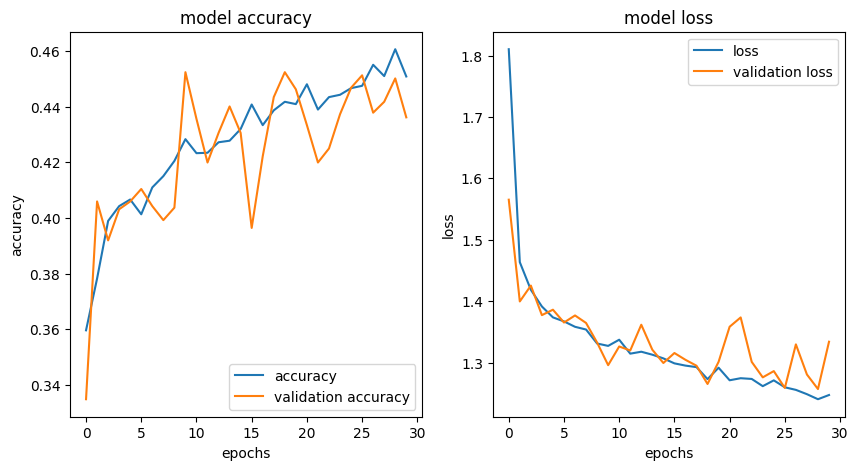

In [17]:
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.plot(fit.history['accuracy'], label='accuracy')
plt.plot(fit.history['val_accuracy'], label = 'validation accuracy')
plt.legend()
plt.title("model accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")

plt.subplot(1, 2, 2)
plt.plot(fit.history['loss'], label='loss')
plt.plot(fit.history['val_loss'], label = 'validation loss')
plt.legend()
plt.title("model loss")
plt.xlabel("epochs")
plt.ylabel("loss")